In [1]:
!pip install tensorflow

## Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt #For visualization
import pandas as pd
import seaborn as sns

## Data Pre-Processing

### Training Image Pre-Processing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory( #Keras image data loding (https://keras.io/api/data_loading/image/)
    'train', #Folder name (where the data is located)
    labels="inferred", #Labels are generated from the directory structure
    label_mode="categorical", #Labels are encoded as a categorical vector
    class_names=None,
    color_mode="rgb",
    batch_size=32, #If you want to speed up the training process then change this in to 64 or 128
    image_size=(128, 128),
    shuffle=True, #To reduce the biasness of the model you can shuffle it
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 458 files belonging to 2 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

### Validation Image Pre-Processing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory( #Keras image data loding (https://keras.io/api/data_loading/image/)
    'valid', #Folder name (where the data is located)
    labels="inferred", #Labels are generated from the directory structure
    label_mode="categorical", #Labels are encoded as a categorical vector
    class_names=None,
    color_mode="rgb",
    batch_size=32, #If you want to speed up the training process then change this in to 64 or 128
    image_size=(128, 128),
    shuffle=True, #To reduce the biasness of the model you can shuffle it
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 246 files belonging to 2 classes.


In [6]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

### Test Image Pre-Precessing

In [7]:
test_set = tf.keras.utils.image_dataset_from_directory( #Keras image data loding (https://keras.io/api/data_loading/image/)
    'test', #Folder name (where the data is located)
    labels="inferred", #Labels are generated from the directory structure
    label_mode="categorical", #Labels are encoded as a categorical vector
    class_names=None,
    color_mode="rgb",
    batch_size=32, #If you want to speed up the training process then change this in to 64 or 128
    image_size=(128, 128),
    shuffle=True, #To reduce the biasness of the model you can shuffle it
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 62 files belonging to 1 classes.


In [8]:
test_set #128,128=Width and hieght, 3=RGB format of the array, 2=Examples in one batch

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

## Building Model

### Importing Libraries

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D, Flatten, Dropout #For convolution operations
from tensorflow.keras.models import Sequential #Model we use

In [10]:
model = Sequential() #We use sequential model so, this is it object

### Building Convolution Layer

In [11]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3])) #Adding convolution layer to the model. input_shape is the image_size that we added early
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')) #Input shape adding only to the first layer
model.add(MaxPool2D(pool_size=2, strides=2))

D:\SOFTWARES\anacondafiles\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')) #Adding more layers can get good result
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')) #Remove padding to speed the training process
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')) 
model.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [15]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

### Adding Flatten Layer

In [16]:
model.add(Flatten())

### Adding Dense Layer

In [17]:
model.add(Dense(units=1500, activation='relu')) #Units=number of neurons in the dense layer (Hidden laye)

### Adding Output Layer

In [18]:
model.add(Dense(units=2, activation='softmax')) #Using softmax we can get result as probability

## Compiling Model

In [19]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    12,289,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         3,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,004,726 (64.87 MB)

 Trainable params: 17,004,726 (64.87 MB)

 Non-trainable params: 0 (0.00 B)

## Training Model

In [21]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10) #By equal whole thing to training_history, it can easy to do visualization in future
#When runing this if loss is incraesed instead of decreasing its because of overshooting loss function
#This can happen because of high learning rate. Default 0.001 turn into o.ooo1 (https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)
#There may be a chance of underfitiing. So increase number of neurons or can add more convolution layers.

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 948ms/step - accuracy: 0.6407 - loss: 2.6981 - val_accuracy: 0.5569 - val_loss: 0.8942
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6479 - loss: 0.6371 - val_accuracy: 0.5569 - val_loss: 0.6842
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7664 - loss: 0.4603 - val_accuracy: 0.6545 - val_loss: 0.5610
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8268 - loss: 0.3567 - val_accuracy: 0.6951 - val_loss: 0.6214
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8007 - loss: 0.3969 - val_accuracy: 0.7073 - val_loss: 0.5510
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8798 - loss: 0.2747 - val_accuracy: 0.7317 - val_loss: 0.5565
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9028 - loss: 0.2084 - val_accuracy: 0.7154 - val_loss: 0.6520
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8881 - loss: 0.2088 - val_accuracy: 0.7480 - val_lo

## Model Evaluation

### Model Evaluation on Training Set

In [22]:
train_loss_acc = model.evaluate(training_set)

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.9764 - loss: 0.0881


### Model Evaluation on Training Set

In [23]:
valid_loss_acc = model.evaluate(validation_set)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.7406 - loss: 0.6849


## Saving Model

In [24]:
model.save("trained_model1.keras")

## Visualization

In [25]:
training_history.history

{'accuracy': [0.6419214010238647,
  0.6899563074111938,
  0.7620087265968323,
  0.8318777084350586,
  0.836244523525238,
  0.875545859336853,
  0.903930127620697,
  0.8973799347877502,
  0.9410480260848999,
  0.9257642030715942],
 'loss': [1.7087994813919067,
  0.5714853405952454,
  0.4522205591201782,
  0.33431848883628845,
  0.35292336344718933,
  0.27851542830467224,
  0.20838917791843414,
  0.2062603384256363,
  0.16106931865215302,
  0.1723708063364029],
 'val_accuracy': [0.5569105744361877,
  0.5569105744361877,
  0.6544715166091919,
  0.6951219439506531,
  0.707317054271698,
  0.7317073345184326,
  0.7154471278190613,
  0.7479674816131592,
  0.707317054271698,
  0.7601625919342041],
 'val_loss': [0.8942435383796692,
  0.6842176914215088,
  0.5609755516052246,
  0.6213546991348267,
  0.5509593486785889,
  0.5564999580383301,
  0.6519562005996704,
  0.5945291519165039,
  0.7457890510559082,
  0.6491034030914307]}

## Recording History in json

In [26]:
import json
with open("training_history.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

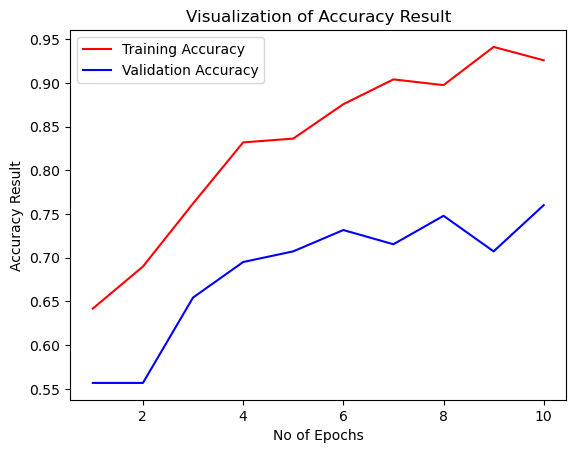

In [27]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Other Matrics For Model Evaluation

In [28]:
class_name = validation_set.class_names
class_name

['Disease', 'Healthy']

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory( #Keras image data loding (https://keras.io/api/data_loading/image/)
    'valid', #Folder name (where the data is located)
    labels="inferred", #Labels are generated from the directory structure
    label_mode="categorical", #Labels are encoded as a categorical vector
    class_names=None,
    color_mode="rgb",
    batch_size=32, #If you want to speed up the training process then change this in to 64 or 128
    image_size=(128, 128),
    shuffle=False, #Change in to false to pass it sequentialy
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 246 files belonging to 2 classes.


In [30]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step


(array([[2.57668763e-01, 7.42331266e-01],
        [9.79168341e-02, 9.02083218e-01],
        [6.31936550e-01, 3.68063360e-01],
        [5.70826866e-02, 9.42917287e-01],
        [1.59923390e-01, 8.40076566e-01],
        [4.38479424e-01, 5.61520636e-01],
        [3.59480768e-01, 6.40519202e-01],
        [4.08707857e-01, 5.91292143e-01],
        [8.74444306e-01, 1.25555724e-01],
        [2.42800172e-02, 9.75719988e-01],
        [6.89245835e-02, 9.31075454e-01],
        [1.41268849e-01, 8.58731151e-01],
        [1.25035018e-01, 8.74965012e-01],
        [5.36703944e-01, 4.63296056e-01],
        [7.85514712e-01, 2.14485317e-01],
        [4.49221302e-03, 9.95507836e-01],
        [6.68421388e-01, 3.31578642e-01],
        [7.81227887e-01, 2.18772143e-01],
        [4.08593863e-01, 5.91406107e-01],
        [8.74805730e-03, 9.91251886e-01],
        [5.51883638e-01, 4.48116362e-01],
        [9.88132179e-01, 1.18678296e-02],
        [6.99272975e-02, 9.30072784e-01],
        [1.38611481e-01, 8.6138850

In [31]:
predicted_categories = tf.argmax(y_pred,axis=1) #Return the maximum value and its index
predicted_categories

<tf.Tensor: shape=(246,), dtype=int64, numpy=
array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1], dtype=int64)>

In [32]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(246, 2), dtype=float32, numpy=
array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]

In [33]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(246,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)>

In [34]:
from sklearn.metrics import classification_report, confusion_matrix #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [35]:
print(classification_report(y_true, predicted_categories, target_names=class_name)) #sklearn.metrics.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')

              precision    recall  f1-score   support

     Disease       0.82      0.73      0.77       137
     Healthy       0.70      0.80      0.75       109

    accuracy                           0.76       246
   macro avg       0.76      0.76      0.76       246
weighted avg       0.77      0.76      0.76       246



### Confusion Matrix

In [36]:
cm = confusion_matrix(y_true, predicted_categories)
cm.shape

(2, 2)

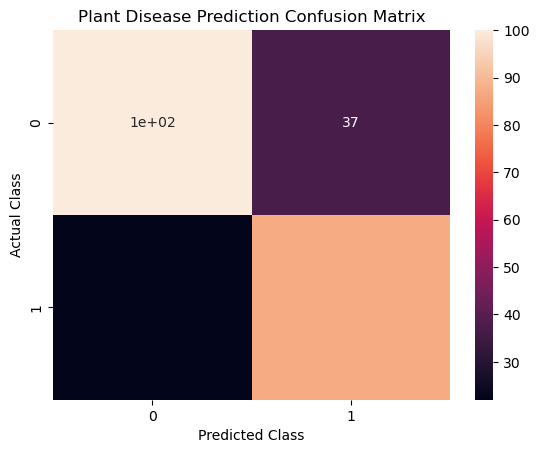

In [37]:
sns.heatmap(cm, annot=True) #https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Plant Disease Prediction Confusion Matrix")
plt.show()